# Dirichlet processes 101

In this notebook, I demonstrate the very basics of DPs: what samples look like, and how to condition. All theoretical matters like existence and unicity are swept under the rag.

In [3]:
%pylab inline
figsize(10,5)

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Import necessary libraries
import numpy as np
import numpy.random as npr
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy.stats as spst

## Stick-breaking definition

If $\alpha>0$ and $G$ is a probability measure on the space where the atoms $\phi$ live, then saying that a measure $\xi$ follows a $\text{DP}(\alpha, G)$ distribution means that
$$ \xi = \sum C_k\delta_{\phi_k},$$
where 
$$ C_k = V_k\prod_{i=1}^{k-1}(1-V_i), $$
$$ V_1, V_2\dots\sim \beta(1,\alpha)\text{ i.i.d},$$
and
$$ \phi_1, \phi_2, \dots \sim G \text{ i.i.d.}$$

This is what I mean when I say that
* a DP is a random discrete measure with an infinite number of atoms.
* a DP is specified through two parameters $\alpha>0$ (the "concentration" of the DP) and $G$ (the "base measure" of the DP). 

## Visualizing DP samples

The definition we used for DPs is constructive. The only issue is that the number of atoms if infinite. For visualization purposes, we can do as follows without any difference to the human eye: we fix a small $\epsilon>0$ and sample $T$ atoms, where
$$ T = \inf\{t \text{ such that } 1-\sum_{k=1}^t C_k <\epsilon \}.$$
Note that the mass of $\xi$ that we will not plot is $\sum_{k>T}{C_k}<\epsilon$.

In [5]:
G = spst.gamma(1)

In [6]:
def sample(alpha=1., baseMeasure=G, eps=1e-3):
    """
    sample a Dirichlet process from its stick-breaking construction
    """
    V = [spst.beta(1,alpha).rvs()]
    C = V.copy()    # We will store both C and V for ease of manipulation
    phi = [baseMeasure.rvs()]

    while 1-np.sum(C)>eps:
        V.append(spst.beta(1,alpha).rvs())
        C.append(V[-1]*np.prod([1-np.array(V[:-1])]))
        phi.append(G.rvs())
    
    return V, C, phi

Now we can plot our discrete measure

In [7]:
def plotResults(V, C, phi):
    """
    plot the results of sampling
    """
    #plot the sample
    plt.subplot(2,1,1)
    print("Number of atoms:", len(V))
    for i in range(len(V)):
        plt.plot([phi[i],phi[i]], [0,C[i]], 'b')
    
    # plot the base measure
    m, M = np.min(phi), np.max(phi)
    delta = (M-m)/2
    xPlot = np.linspace(m-delta, M+delta,100)
    plt.plot(xPlot, G.pdf(xPlot), 'g', label="G")
    plt.xlabel("$\phi$")
    plt.legend()

    #plot the stick-breaking
    plt.subplot(2,1,2)
    CC = np.cumsum([0]+C)
    for i in range(len(C)):
        plt.plot([CC[i],CC[i+1]],[0.5,0.5], marker='v')
    plt.xlim([-.1,1.1])

Number of atoms: 79


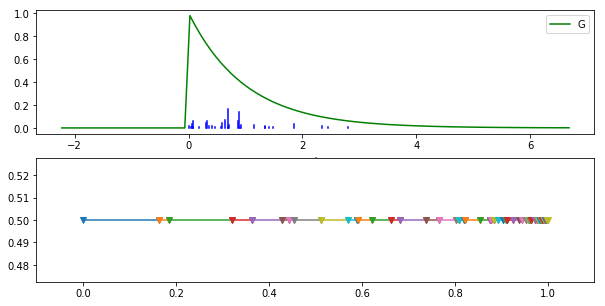

In [8]:
V, C, phi = sample(alpha=10, baseMeasure=G) # play with parameters alpha and G
plotResults(V, C, phi)
plt.show()

Number of atoms: 11


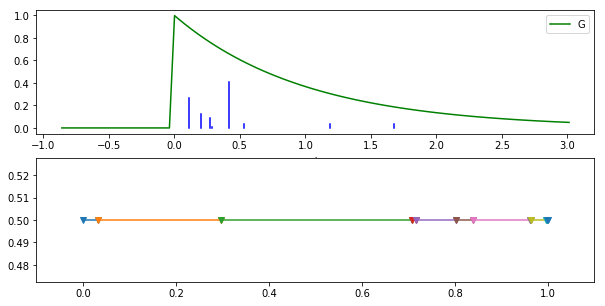

In [15]:
V, C, phi = sample(alpha=1, baseMeasure=G) # play with parameters alpha and G
plotResults(V, C, phi)
plt.show()

## Conditioning

By Ferguson's theorem, the posterior is 
$$
\xi \vert \phi_1,\dots,\phi_n \sim \text{DP}(\alpha+n, \frac{\alpha}{\alpha+n} G + \frac{1}{\alpha+n} \sum_{i=1}^n\delta_{\phi_i}).
$$
so what do you think posterior samples look like?